In [2]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/thermodynamics.git@master

  Cloning https://github.com/ParkhomenkoDV/thermodynamics.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-7ogt3jrc
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/thermodynamics.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-7ogt3jrc
  Resolved https://github.com/ParkhomenkoDV/thermodynamics.git to commit 4b3b4b95fa107ae860a6f87f331801c672367a31
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/ParkhomenkoDV/mathematics.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-81ky2zca/mathematics_60f837a186264b5087d1429cbfd4a5c2
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/mathematics.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-81ky2zca/mathematic

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from thermodynamics import gas_const, heat_capacity_at_constant_pressure, gdf, atmosphere_standard

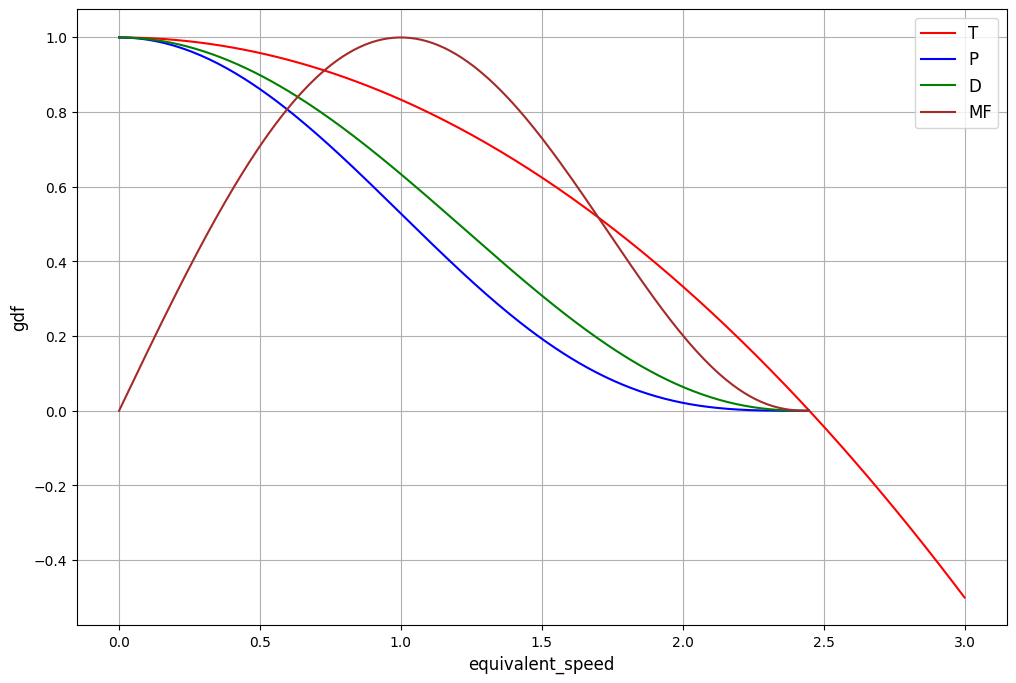

In [51]:
equivalent_speed = np.linspace(0, 3, 300)
k = 1.4

plt.figure(figsize=(12, 8))
plt.xlabel("equivalent_speed", fontsize=12)
plt.ylabel("gdf", fontsize=12)
plt.grid()
plt.plot(equivalent_speed, [gdf("T", es, k) for es in equivalent_speed], color="red", label="T")
plt.plot(equivalent_speed, [gdf("P", es, k) for es in equivalent_speed], color="blue", label="P")
plt.plot(equivalent_speed, [gdf("D", es, k) for es in equivalent_speed], color="green", label="D")
plt.plot(equivalent_speed, [gdf("MF", es, k) for es in equivalent_speed], color="brown", label="MF")
plt.legend(fontsize=12)
plt.show()

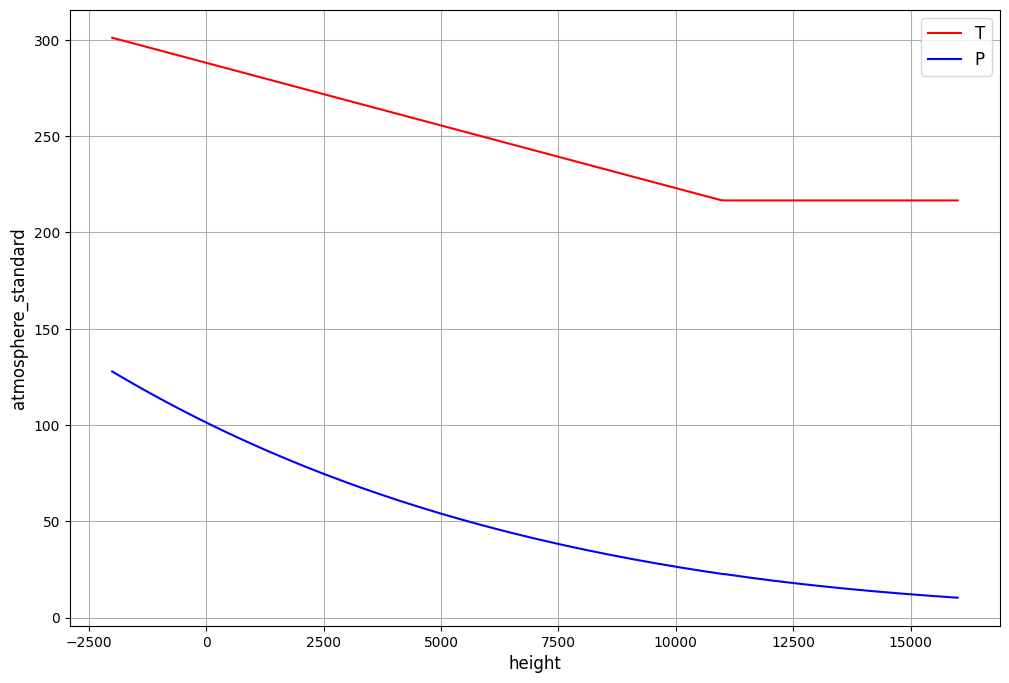

In [60]:
height = np.linspace(-2000, 16_000, 180)

plt.figure(figsize=(12, 8))
plt.xlabel("height", fontsize=12)
plt.ylabel("atmosphere_standard", fontsize=12)
plt.grid()
plt.plot(height, [atmosphere_standard(h)["temperature"][0] for h in height], color="red", label="T")
plt.plot(height, [atmosphere_standard(h)["pressure"][0] / 1000 for h in height], color="blue", label="P")
plt.legend(fontsize=12)
plt.show()

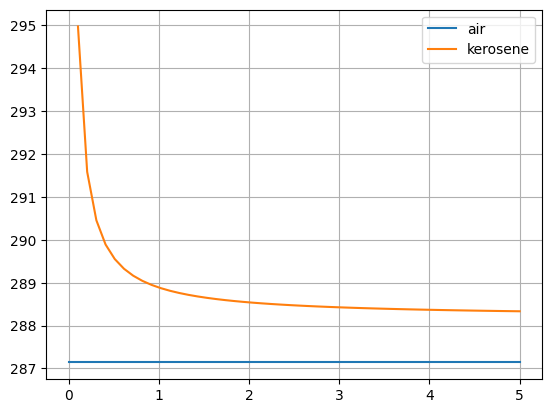

In [3]:
eo = np.linspace(0, 5)

plt.plot(eo, [gas_const("air") for _ in eo], label="air")
plt.plot(eo, [gas_const("exhaust", eo, fuel="kerosene") for eo in eo], label="kerosene")

plt.legend()
plt.grid()
plt.show()

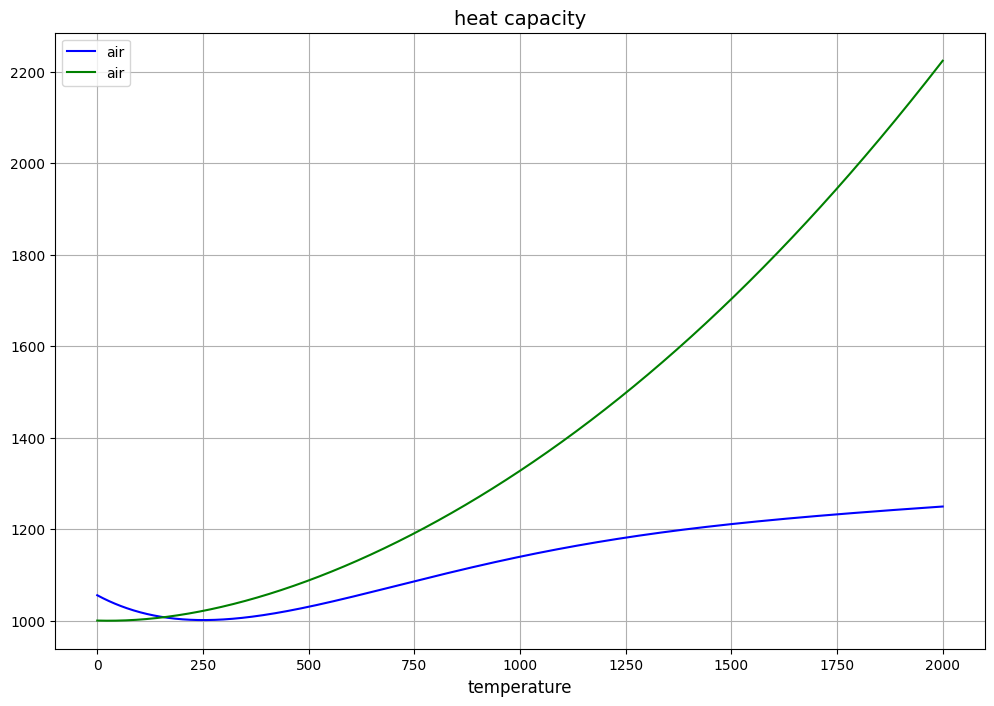

In [26]:
temperature = np.linspace(0, 2000, 1000)


def cp_air(t):
    return heat_capacity_at_constant_pressure("N2", t) * 0.7808 + heat_capacity_at_constant_pressure("O2", t) * 0.2095 + heat_capacity_at_constant_pressure("Ar", t) * 0.0093 + heat_capacity_at_constant_pressure("CO2", t) * 0.00034


plt.figure(figsize=(12, 8))
plt.title("heat capacity", fontsize=14)
plt.xlabel("temperature", fontsize=12)
plt.plot(temperature, [heat_capacity_at_constant_pressure("air", t) for t in temperature], color="blue", label="air")
plt.plot(temperature, [cp_air(t) for t in temperature], color="green", label="air")
plt.legend()
plt.grid()
plt.show()

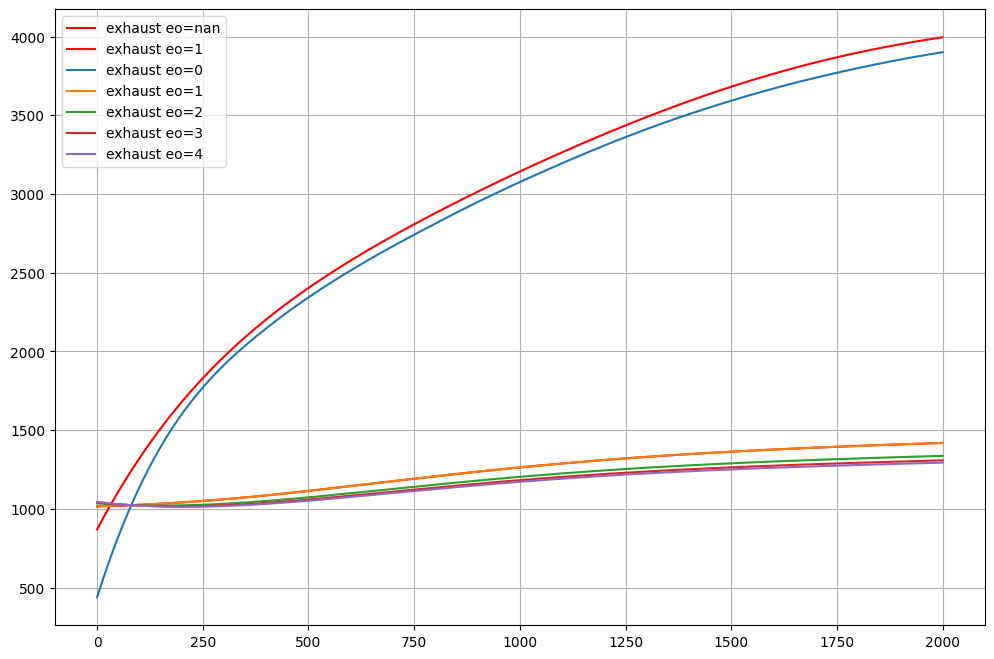

In [17]:
temperature = np.linspace(0, 2000, 1000)
fuel = "kerosene"

plt.figure(figsize=(12, 8))

plt.plot(temperature, [heat_capacity_at_constant_pressure("exhaust", t, fuel=fuel) for t in temperature], color="red", label="exhaust eo=nan")  # ЦИАМ
plt.plot(temperature, [heat_capacity_at_constant_pressure("exhaust", t, excess_oxidizing=1, fuel=fuel) for t in temperature], color="red", label="exhaust eo=1")
for eo in range(5):
    plt.plot(temperature, [heat_capacity_at_constant_pressure("exhaust", t, excess_oxidizing=eo, fuel=fuel) for t in temperature], label=f"exhaust {eo=}")

plt.legend()
plt.grid()
plt.show()